In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>")) #作業領域を広くする

In [2]:
#kaggle課題　car fuel consumption ツールのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,SGDClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import classification_report, accuracy_score #予測結果の識別率を算出
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
# 回帰問題における性能評価に関する関数ラベルを予測
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix 
import io
import datetime
from datetime import datetime as dt

In [3]:
df = pd.read_csv("measurements.csv")
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.notnull().sum() 

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [5]:
df['specials'].value_counts().to_dict()

{'AC': 6,
 'AC Sun': 1,
 'AC rain': 9,
 'AC snow': 1,
 'AC sun': 1,
 'ac': 8,
 'ac rain': 1,
 'half rain half sun': 1,
 'rain': 32,
 'snow': 3,
 'sun': 27,
 'sun ac': 3}

In [6]:
#「specials」以外の変数でデータフレーム再作成
df2 = pd.read_csv("measurements.csv")[['distance','consume','speed', 'temp_inside', 'temp_outside','gas_type', 'AC',
                                                      'rain','sun','refill liters','refill gas']]
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,E10,0,0,0,NaN,NaN


In [7]:
df3=df2.dropna(subset=['refill liters'])
df3.head(13)
#以下の結果から「gas_type」と「refill gas」は同種であり、混在がないと分かる。
#またrefill litersとconsumeは水準が1桁違うので、refill litersはconsumeに影響しないと考える。

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,E10,0,0,0,45,E10
44,"5,4","3,3",32,"21,5",7,SP98,0,0,0,"37,6",SP98
82,"10,5","3,6",42,20,10,SP98,0,0,0,"37,7",SP98
106,"162,7","5,5",75,23,1,SP98,0,0,0,45,SP98
139,"16,1","5,4",24,"21,5",7,E10,0,1,0,38,E10
171,"44,4","4,8",38,"21,5",8,E10,0,0,0,"38,3",E10
191,"43,7","4,7",44,22,9,SP98,0,1,0,10,SP98
192,"12,1","4,2",43,22,4,SP98,0,0,0,39,SP98
234,19,"4,5",29,"22,5",10,E10,0,0,0,39,E10
274,"25,7","4,9",50,22,10,SP98,0,1,0,41,SP98


In [8]:
df['gas_type'].value_counts().to_dict() #gas_typeの数を確認する

{'E10': 160, 'SP98': 228}

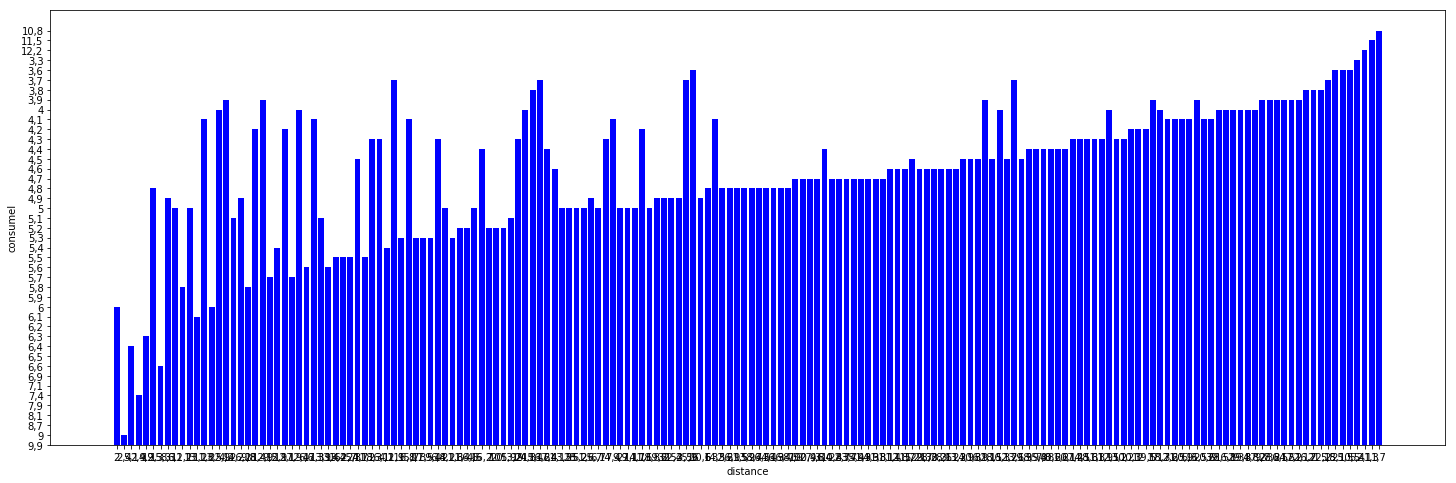

In [9]:
#consumeとdistanceの関係を確認する
df_S=df.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,8))
y=df_S["consume"]
x=df_S["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consumel")
plt.show()

In [10]:
#SP98のデータフレーム
df_SP=df.drop(df.index[df["gas_type"] =='E10'], axis=0) 
df_SP.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
44,"5,4","3,3",32,"21,5",7,NaN,SP98,0,0,0,"37,6",SP98
45,2,"9,9",21,"21,5",4,NaN,SP98,0,0,0,NaN,NaN
46,"14,2","5,1",32,"21,5",7,NaN,SP98,0,0,0,NaN,NaN


In [11]:
#SP10のデータフレーム
df_E=df.drop(df.index[df["gas_type"] =='SP98'], axis=0) 
df_E.head(3)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN


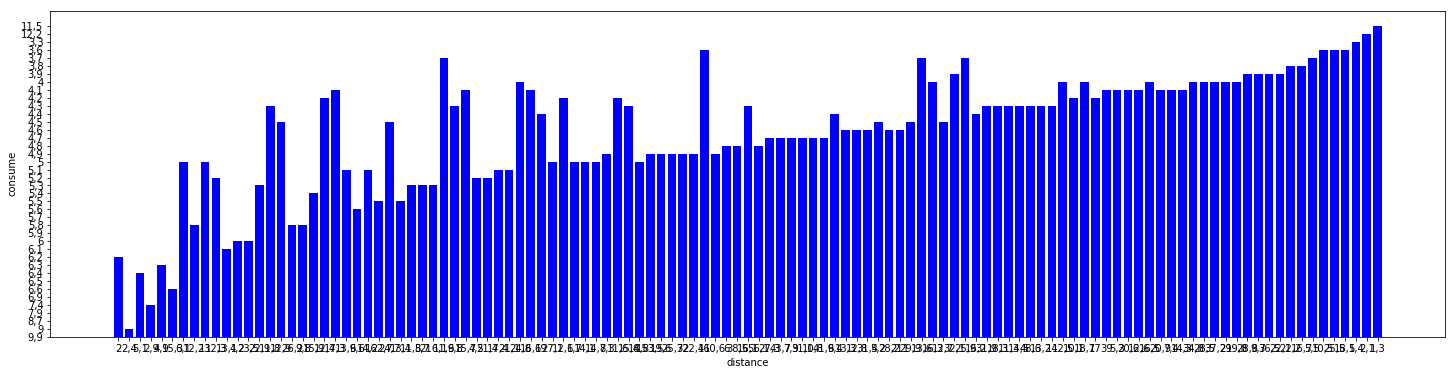

In [12]:
#SP98のconsumeとdistanceの関係を確認する
df_S_SP=df_SP.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_SP["consume"]
x=df_S_SP["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

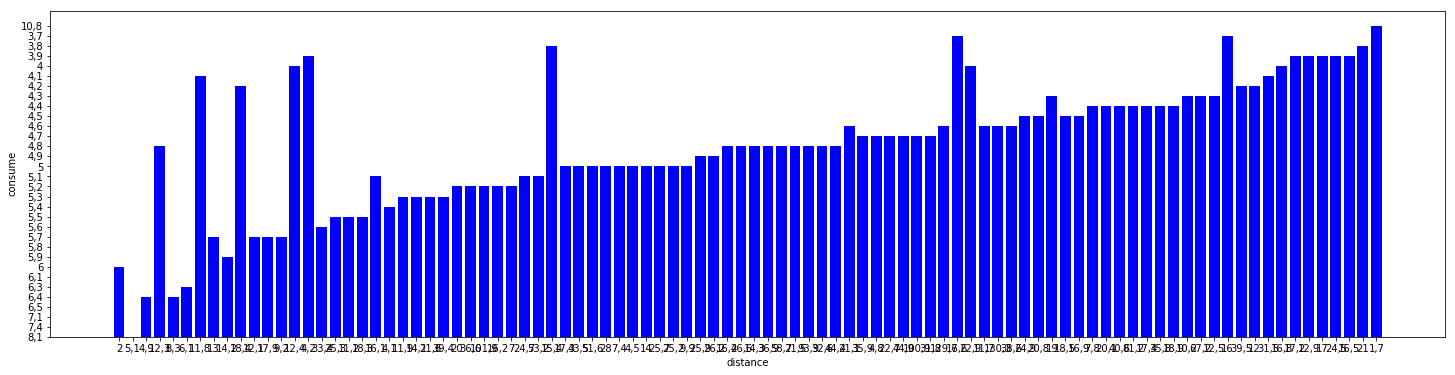

In [13]:
#E10のconsumeとdistanceの関係を確認する
df_S_E=df_E.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_S_E["consume"]
x=df_S_E["distance"]
plt.bar(x,y,color="b")
plt.xlabel("distance")
plt.ylabel("consume")
plt.show()

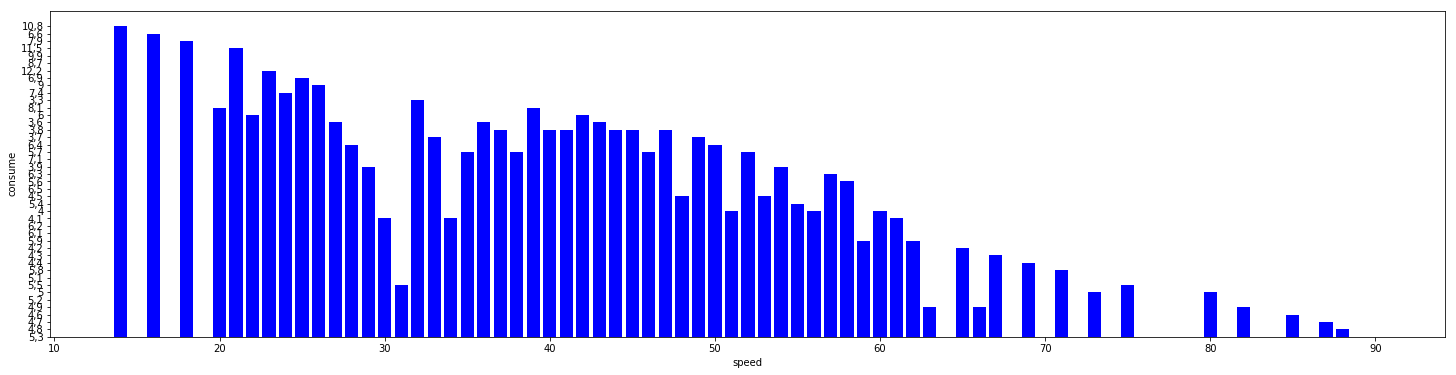

In [14]:
#全体のspeedとconsumeの関係を確認する
df_speed=df2.sort_values(by='speed',ascending=False)
plt.figure(figsize=(25,6))
y=df_speed["consume"]
x=df_speed["speed"]
plt.bar(x,y,color="b")
plt.xlabel("speed")
plt.ylabel("consume")
plt.show()

In [15]:
df2.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [16]:
df2['distance']=df2['distance'].str.replace(",",".").astype(float)
df2['consume']=df2['consume'].str.replace(",",".").astype(float)
df2['temp_inside']=df2['temp_inside'].str.replace(",",".").astype(float)

In [17]:
df3=pd.get_dummies(df2['refill gas'])
df2=pd.concat([df2,df3],axis=1)
df2.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98
0,28.0,5.0,26,21.5,12,E10,0,0,0,45,E10,1,0
1,12.0,4.2,30,21.5,13,E10,0,0,0,NaN,NaN,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0,NaN,NaN,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0,NaN,NaN,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0,NaN,NaN,0,0


In [18]:
#temp_insideの空白値等を平均値で埋める
value=df2['temp_inside'].mean()
df2['temp_inside']=df2['temp_inside'].replace([""],value)
df2['temp_inside']=df2['temp_inside'].replace(["nan"],value)
df2.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,E10,SP98
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.012887,0.020619
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,0.112931,0.142287
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# warning出力時にjupyterがインストールされているフォルダが見えてしまうので抑制する
import warnings
#warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=Warning)

In [10]:
df2['temp_inside'][93,95,97,98,99,100,102,201,203,261,267,268]=value

In [13]:
#「nan」が置き換わったことの確認
df2['temp_inside'][93]

21.929521276595743

In [19]:
#平均値で置換して良かったか分布を確認
df2['temp_inside'].describe()

count    376.000000
mean      21.929521
std        1.010455
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [22]:
df2['temp_outside'].describe()

count    388.000000
mean      11.358247
std        6.991542
min       -5.000000
25%        7.000000
50%       10.000000
75%       16.000000
max       31.000000
Name: temp_outside, dtype: float64

In [20]:
df2['temp_inside'][93]=df2['temp_inside'][92]
df2['temp_inside'][95]=df2['temp_inside'][94]
df2['temp_inside'][97,98,99,100]=df2['temp_inside'][96]
df2['temp_inside'][102]=df2['temp_inside'][101]
df2['temp_inside'][201]=df2['temp_inside'][200]
df2['temp_inside'][203]=df2['temp_inside'][202]
df2['temp_inside'][261]=df2['temp_inside'][260]
df2['temp_inside'][267,268]=df2['temp_inside'][266]

In [21]:
df2['temp_inside'].describe()

count    388.000000
mean      21.890464
std        1.035038
min       19.000000
25%       21.500000
50%       22.000000
75%       22.500000
max       25.500000
Name: temp_inside, dtype: float64

In [22]:
#室内温度と室外温度の絶対値を新たな説明変数とし、室内温度と室外温度を除外する
df2['temp']=np.abs(df2['temp_inside']-df2['temp_outside'])
df2=df2.drop(['temp_inside','temp_outside'],axis=1)
df2.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,28.0,5.0,26,E10,0,0,0,45,E10,1,0,9.5
1,12.0,4.2,30,E10,0,0,0,NaN,NaN,0,0,8.5
2,11.2,5.5,38,E10,0,0,0,NaN,NaN,0,0,6.5
3,12.9,3.9,36,E10,0,0,0,NaN,NaN,0,0,7.5
4,18.5,4.5,46,E10,0,0,0,NaN,NaN,0,0,6.5


In [23]:
#相関係数を算出
df2.corr()

,distance,consume,speed,AC,rain,sun,E10,SP98,temp
distance,1.000000,-0.128967,0.562299,-0.025738,-0.019791,0.081120,0.026079,0.106134,-0.101858
consume,-0.128967,1.000000,-0.227866,0.096591,0.248118,-0.170667,-0.025731,-0.079080,0.316674
speed,0.562299,-0.227866,1.000000,-0.035408,0.009489,0.081618,-0.073428,0.046177,-0.022754
AC,-0.025738,0.096591,-0.035408,1.000000,0.242915,0.088598,-0.033075,-0.042002,-0.069744
rain,-0.019791,0.248118,0.009489,0.242915,1.000000,-0.112650,0.026474,0.055653,0.185662
sun,0.081120,-0.170667,0.081618,0.088598,-0.112650,1.000000,-0.034256,-0.043501,-0.294890
E10,0.026079,-0.025731,-0.073428,-0.033075,0.026474,-0.034256,1.000000,-0.016578,-0.001406
SP98,0.106134,-0.079080,0.046177,-0.042002,0.055653,-0.043501,-0.016578,1.000000,0.037579
temp,-0.101858,0.316674,-0.022754,-0.069744,0.185662,-0.294890,-0.001406,0.037579,1.000000


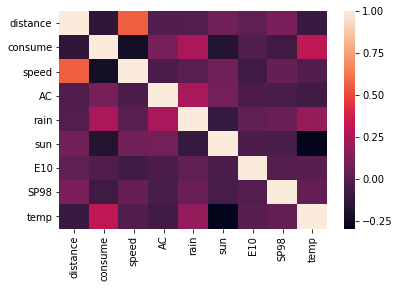

In [27]:
#相関係数をヒートマップにして可視化
sns.heatmap(df2.corr())
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000166F2950908>,
      dtype=object)

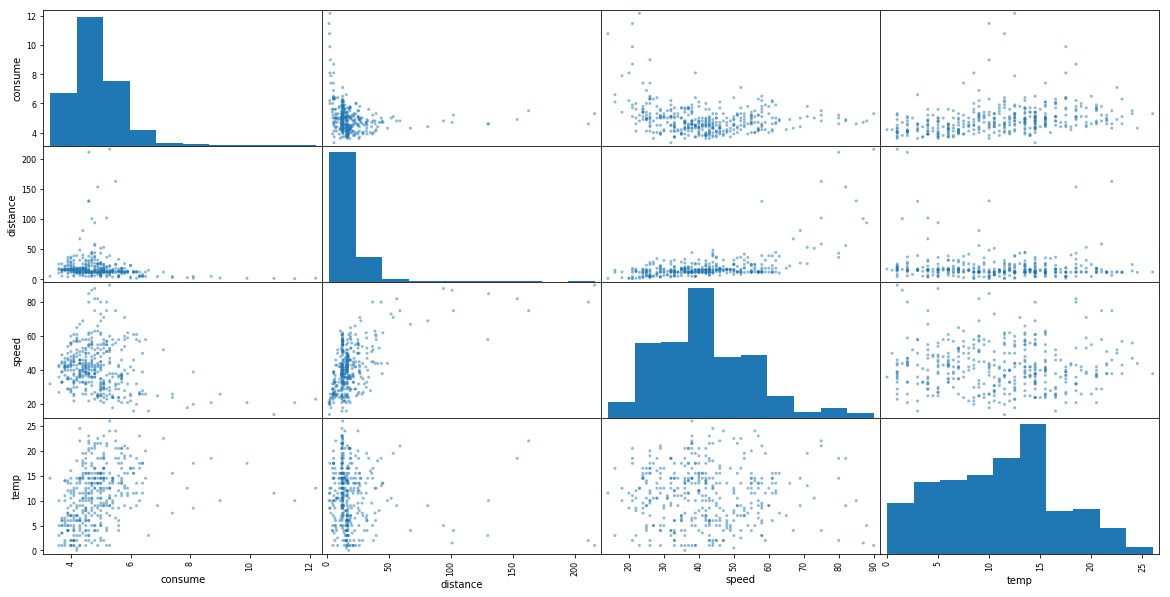

In [28]:
# 散布図行列を書いてみる
df10=df2[["consume","distance","speed","temp"]]
pd.plotting.scatter_matrix(df10,figsize=(20,10)) #数字または数字化した要素での散布図の作成

In [23]:
#精度格納用
df_precision = pd.DataFrame(index=['MSE','RMSE','MAE','RMSE/MAE','決定係数','MSE（訓練）','RMSE（訓練）','MAE（訓練）','RMSE/MAE（訓練）','決定係数（訓練）'])
display(df_precision)

""
MSE
RMSE
MAE
RMSE/MAE
決定係数
MSE（訓練）
RMSE（訓練）
MAE（訓練）
RMSE/MAE（訓練）
決定係数（訓練）


In [24]:
#全てのデータで回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)


df_precision['線形（全）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)


,線形（全）
MSE,0.635
RMSE,0.797
MAE,0.650
RMSE/MAE,1.227
決定係数,0.077
MSE（訓練）,0.901
RMSE（訓練）,0.949
MAE（訓練）,0.606
RMSE/MAE（訓練）,1.566
決定係数（訓練）,0.222


In [30]:
df11=df2[["distance","speed","temp","rain","sun","SP98"]]
df11.corr()

,distance,speed,temp,rain,sun,SP98
distance,1.000000,0.562299,-0.101858,-0.019791,0.081120,0.106134
speed,0.562299,1.000000,-0.022754,0.009489,0.081618,0.046177
temp,-0.101858,-0.022754,1.000000,0.185662,-0.294890,0.037579
rain,-0.019791,0.009489,0.185662,1.000000,-0.112650,0.055653
sun,0.081120,0.081618,-0.294890,-0.112650,1.000000,-0.043501
SP98,0.106134,0.046177,0.037579,0.055653,-0.043501,1.000000


In [25]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['線形（高相）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)


,線形（全）,線形（高相）
MSE,0.635,0.630
RMSE,0.797,0.794
MAE,0.650,0.647
RMSE/MAE,1.227,1.227
決定係数,0.077,0.084
MSE（訓練）,0.901,0.910
RMSE（訓練）,0.949,0.954
MAE（訓練）,0.606,0.607
RMSE/MAE（訓練）,1.566,1.571
決定係数（訓練）,0.222,0.215


In [26]:
#consumeと相関の高いデータのみで回帰、説明変数間の相関は考慮せず（"AC","E10"を最初の回帰の説明変数からはずす）
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","AC","E10"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['線形（高相2）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)



,線形（全）,線形（高相）,線形（高相2）
MSE,0.635,0.630,0.640
RMSE,0.797,0.794,0.800
MAE,0.650,0.647,0.652
RMSE/MAE,1.227,1.227,1.228
決定係数,0.077,0.084,0.069
MSE（訓練）,0.901,0.910,0.909
RMSE（訓練）,0.949,0.954,0.953
MAE（訓練）,0.606,0.607,0.605
RMSE/MAE（訓練）,1.566,1.571,1.576
決定係数（訓練）,0.222,0.215,0.215


In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [28]:
#全てのデータで多項式回帰
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['多項式（全）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)


,線形（全）,線形（高相）,線形（高相2）,多項式（全）
MSE,0.635,0.630,0.640,1.367
RMSE,0.797,0.794,0.800,1.169
MAE,0.650,0.647,0.652,0.682
RMSE/MAE,1.227,1.227,1.228,1.715
決定係数,0.077,0.084,0.069,-0.988
MSE（訓練）,0.901,0.910,0.909,0.641
RMSE（訓練）,0.949,0.954,0.953,0.801
MAE（訓練）,0.606,0.607,0.605,0.555
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443
決定係数（訓練）,0.222,0.215,0.215,0.446


In [29]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df2['consume'].values
X=df2.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(y_train, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(y_train, y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['多項式（高相）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)


,線形（全）,線形（高相）,線形（高相2）,多項式（全）,多項式（高相）
MSE,0.635,0.630,0.640,1.367,0.521
RMSE,0.797,0.794,0.800,1.169,0.722
MAE,0.650,0.647,0.652,0.682,0.561
RMSE/MAE,1.227,1.227,1.228,1.715,1.286
決定係数,0.077,0.084,0.069,-0.988,0.243
MSE（訓練）,0.901,0.910,0.909,0.641,0.753
RMSE（訓練）,0.949,0.954,0.953,0.801,0.868
MAE（訓練）,0.606,0.607,0.605,0.555,0.572
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443,1.518
決定係数（訓練）,0.222,0.215,0.215,0.446,0.349


In [30]:
from IPython.display import display
from sklearn.preprocessing import StandardScaler, MinMaxScaler

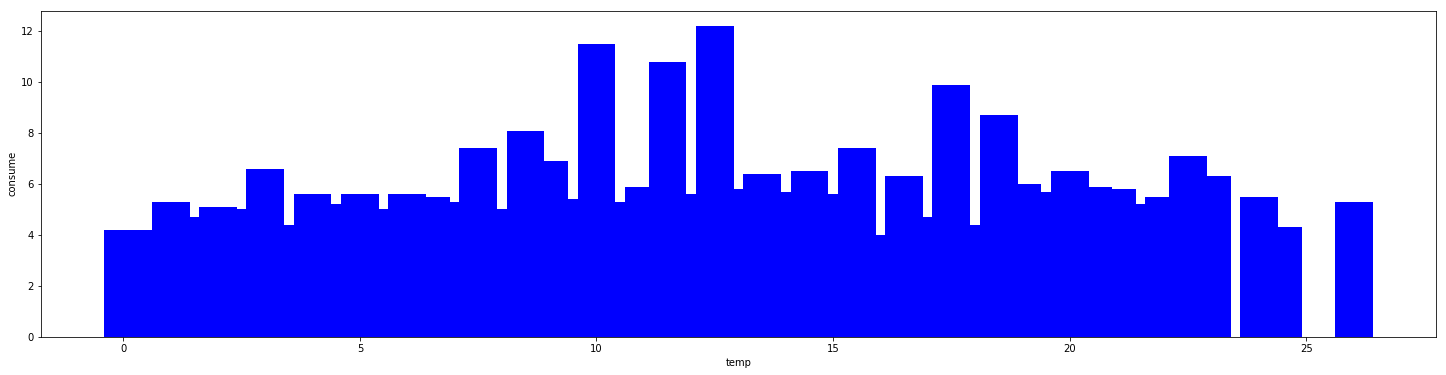

In [31]:
#全体のtempとconsumeの関係を確認する
df_temp=df2.sort_values(by='temp',ascending=False)
plt.figure(figsize=(25,6))
y=df_temp["consume"]
x=df_temp["temp"]
plt.bar(x,y,color="b")
plt.xlabel("temp")
plt.ylabel("consume")
plt.show()

In [32]:
#晴れている日の数を確認
df2['sun'].value_counts().to_dict()

{0: 356, 1: 32}

In [33]:
#sunの燃費の平均を算出し、「晴れていない日」「晴れている日」の燃費を比較
df_consume=df2.groupby(["sun"]).sum()["consume"]
df_consume_n=df2["sun"].value_counts()
dm_average=df_consume/df_consume_n
dm_average.sort_values(ascending=False)
#sunの日は燃費が若干良い

sun
0    4.965169
1    4.325000
dtype: float64

In [34]:
#gas_typeの数を再確認
df2['gas_type'].value_counts().to_dict()

{'E10': 160, 'SP98': 228}

In [35]:
#gas_typeの燃費の平均を算出し、各typeの燃費を比較
df_consume=df2.groupby(["gas_type"]).sum()["consume"]
df_consume_n=df2["gas_type"].value_counts()
dm_average=df_consume/df_consume_n
dm_average.sort_values(ascending=False)
#gas_typeの燃費の差はほとんどない

E10     4.931250
SP98    4.899123
dtype: float64

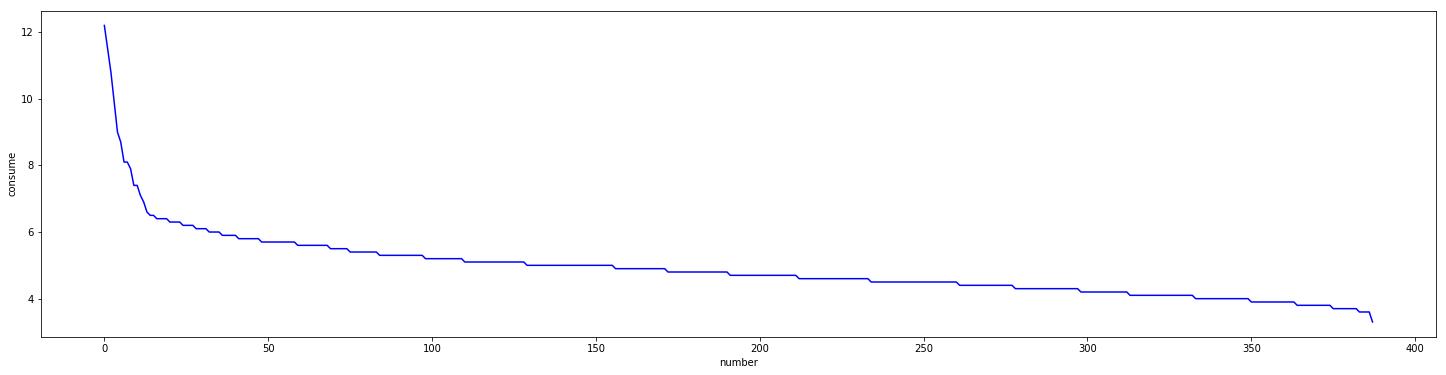

In [36]:
#consumeの分布を確認する
df_consume=df2.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_consume["consume"]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("consume")
plt.show()

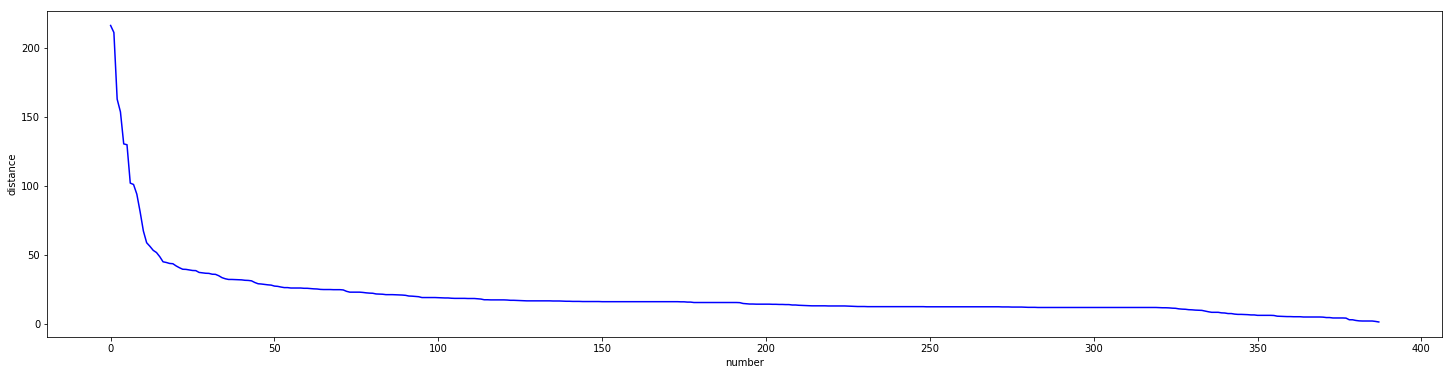

In [37]:
#distanceの分布を確認する(4月19日、斉藤先生のアドバイスで追加するもの)
df_distance=df2.sort_values(by='distance',ascending=False)
plt.figure(figsize=(25,6))
y=df_distance["distance"]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("distance")
plt.show()

In [38]:
df3=df2
a=np.array(df3['consume'])
df3['consume']=np.log(a)
df3.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,28.0,1.609438,26,E10,0,0,0,45,E10,1,0,9.5
1,12.0,1.435085,30,E10,0,0,0,NaN,NaN,0,0,8.5
2,11.2,1.704748,38,E10,0,0,0,NaN,NaN,0,0,6.5
3,12.9,1.360977,36,E10,0,0,0,NaN,NaN,0,0,7.5
4,18.5,1.504077,46,E10,0,0,0,NaN,NaN,0,0,6.5


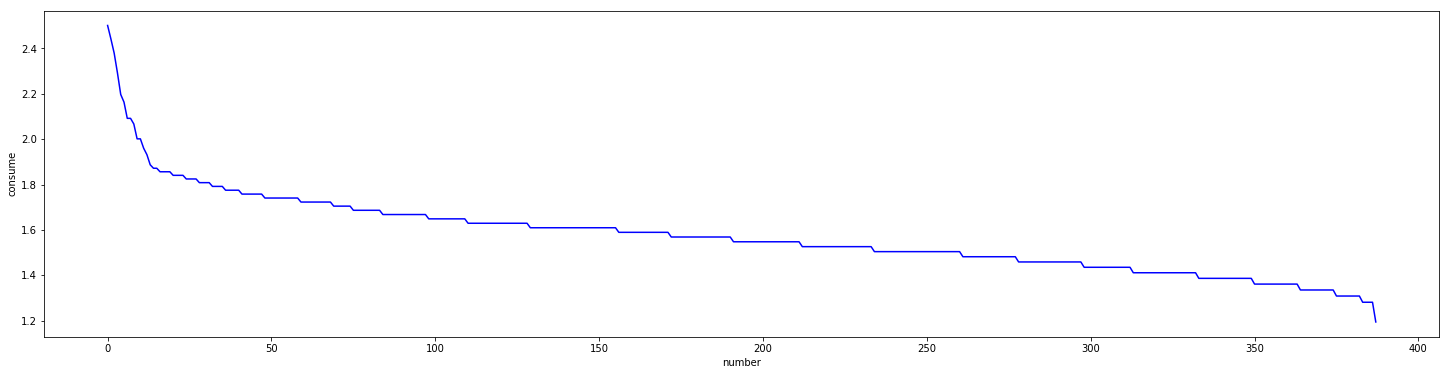

In [39]:
#logを取った後のconsumeの分布を確認する
df_consume=df3.sort_values(by='consume',ascending=False)
plt.figure(figsize=(25,6))
y=df_consume["consume"]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("consume")
plt.show()

In [40]:
b=np.array(df3['distance'])
df3['distance']=np.log(b)
df3.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,3.332205,1.609438,26,E10,0,0,0,45,E10,1,0,9.5
1,2.484907,1.435085,30,E10,0,0,0,NaN,NaN,0,0,8.5
2,2.415914,1.704748,38,E10,0,0,0,NaN,NaN,0,0,6.5
3,2.557227,1.360977,36,E10,0,0,0,NaN,NaN,0,0,7.5
4,2.917771,1.504077,46,E10,0,0,0,NaN,NaN,0,0,6.5


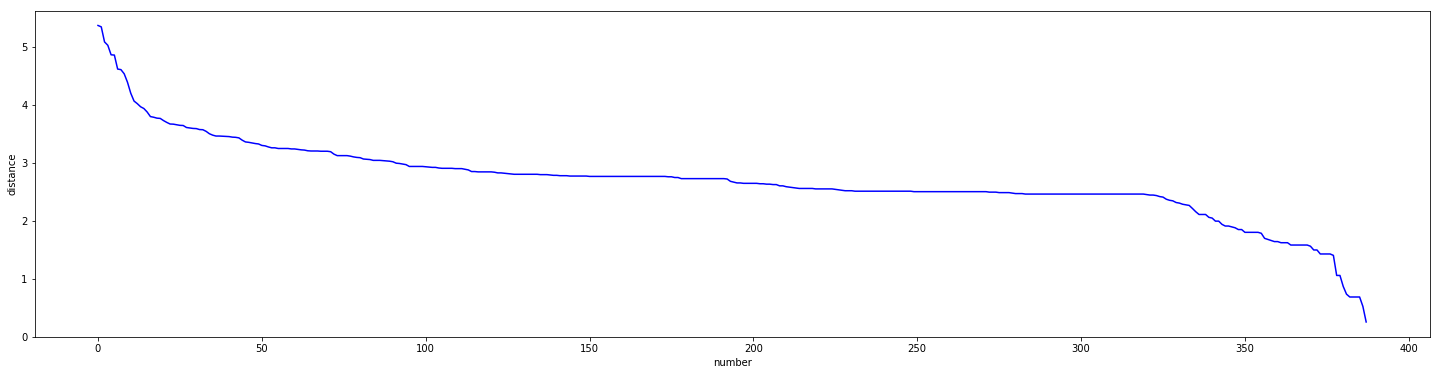

In [41]:
#logを取った後のdistanceの分布を確認する
df_distance=df3.sort_values(by='distance',ascending=False)
plt.figure(figsize=(25,6))
y=df_distance["distance"]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("distance")
plt.show()

In [390]:
#（参考：べき正規変換を検討）使用せず
df100=df3['distance']/8

In [391]:
#（参考：べき正規変換を検討）使用せず
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
h=np.array(df100)
h=h.reshape(1, -1)
L=pt.fit_transform(h)
df100=pd.DataFrame(L.reshape(-1, 1))
df100.head()

,0
0,1.951149e+07
1,1.488462e+04
2,8.296261e+03
3,2.746857e+04
4,5.826690e+05


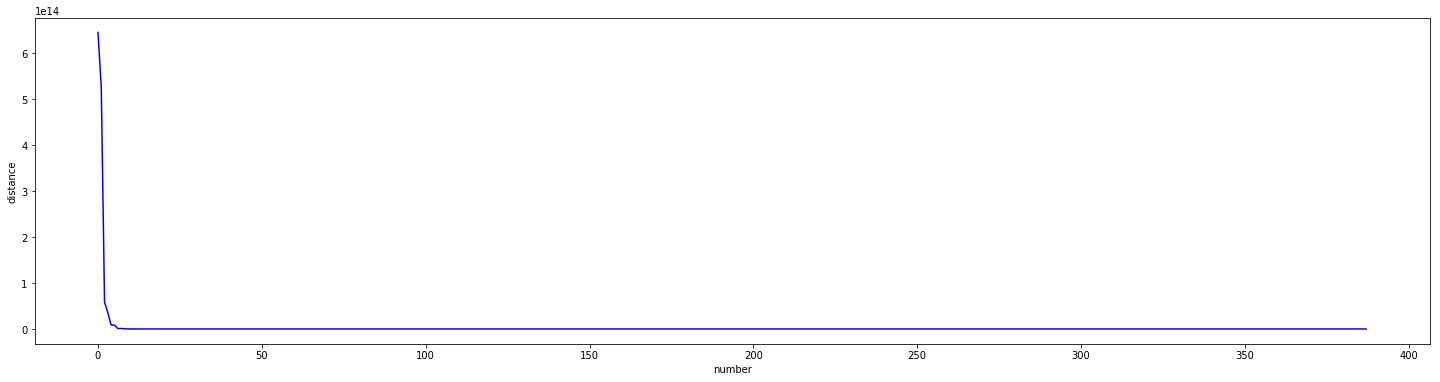

In [392]:
#（参考：べき正規変換を検討）使用せず
df_distance=df100.sort_values(by=[0],ascending=False)
plt.figure(figsize=(25,6))
y=df_distance[0]
x = np.linspace(0, 387, 388)
plt.plot(x,y,color="b")
plt.xlabel("number")
plt.ylabel("distance")
plt.show()

In [42]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df3['consume'].values
X=df3.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# 回帰
regr = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('linear', LinearRegression())])

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(np.e**y_test, np.e**y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.e**y_test, np.e**y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(np.e**y_train, np.e**y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['多項式（高相2）'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)


,線形（全）,線形（高相）,線形（高相2）,多項式（全）,多項式（高相）,多項式（高相2）
MSE,0.635,0.630,0.640,1.367,0.521,0.603
RMSE,0.797,0.794,0.800,1.169,0.722,0.777
MAE,0.650,0.647,0.652,0.682,0.561,0.594
RMSE/MAE,1.227,1.227,1.228,1.715,1.286,1.308
決定係数,0.077,0.084,0.069,-0.988,0.243,0.214
MSE（訓練）,0.901,0.910,0.909,0.641,0.753,0.609
RMSE（訓練）,0.949,0.954,0.953,0.801,0.868,0.780
MAE（訓練）,0.606,0.607,0.605,0.555,0.572,0.489
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443,1.518,1.594
決定係数（訓練）,0.222,0.215,0.215,0.446,0.349,0.493


In [43]:
from sklearn.model_selection import KFold # 交差検証法に関する関数
from sklearn.metrics import mean_absolute_error # 回帰問題における性能評価に関する関数

#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df3['consume'].values
X=df3.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
cross_valid_mae2 = 0

cro_val_決定 = 0
cro_val_決定2 = 0

split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test) 
    
    # 訓練データに対する予測を実行
    y_pred2 = regr.predict(X_train)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(np.e**y_test, np.e**y_pred)
    cro_val_決定 = regr.score(X_test, y_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print("決定係数=%s"%regr.score(X_test, y_test))
    print()

    # 訓練データに対するMAEを計算
    mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)
    cro_val_決定2 = regr.score(X_train, y_train)
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    cross_valid_mae2 += mae2
    cro_val_決定 += cro_val_決定
    cro_val_決定2 += cro_val_決定2
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
final_mae2 = cross_valid_mae2 / n_split
final_決定 = cro_val_決定 / n_split
final_決定2 = cro_val_決定2 / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Vali 決定係数 = %s"%round(final_決定, 5))
print()
print("（訓練）Cross Validation MAE = %s"%round(final_mae2, 3))
print("（訓練）Cross Validation 決定 = %s"%round(final_決定2, 5))

Fold 1
MAE = 0.733
決定係数=0.16851790344758322

Fold 2
MAE = 0.685
決定係数=0.16079966957284342

Fold 3
MAE = 0.674
決定係数=0.010887171514362692

Fold 4
MAE = 0.507
決定係数=0.12305410267888983

Fold 5
MAE = 0.54
決定係数=-0.9134286203670543

Cross Validation MAE = 0.628
Cross Vali 決定係数 = -0.36537

（訓練）Cross Validation MAE = 0.541
（訓練）Cross Validation 決定 = 0.13299


In [44]:
# 標準化。distance、speed、tempを標準化する。
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
df3["distance"]=stdsc.fit_transform(df3[["distance"]].values)
df3["speed"]=stdsc.fit_transform(df3[["speed"]].values)
df3["temp"]=stdsc.fit_transform(df3[["temp"]].values)
df3.head()

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,0.917030,1.609438,-1.172804,E10,0,0,0,45,E10,1,0,-0.272760
1,-0.320966,1.435085,-0.878274,E10,0,0,0,NaN,NaN,0,0,-0.446395
2,-0.421773,1.704748,-0.289216,E10,0,0,0,NaN,NaN,0,0,-0.793666
3,-0.215298,1.360977,-0.436480,E10,0,0,0,NaN,NaN,0,0,-0.620031
4,0.311496,1.504077,0.299843,E10,0,0,0,NaN,NaN,0,0,-0.793666


In [45]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰　
y=df3['consume'].values
X=df3.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
cross_valid_mae2 = 0

cro_val_決定 = 0
cro_val_決定2 = 0

split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)   
    
    # 訓練データに対する予測を実行
    y_pred2 = regr.predict(X_train)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(np.e**y_test, np.e**y_pred)
    cro_val_決定 = regr.score(X_test, y_test)
    
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print("決定係数=%s"%regr.score(X_test, y_test))
    print()

    # 訓練データに対するMAEを計算
    mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)
    cro_val_決定2 = regr.score(X_train, y_train)    
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    cross_valid_mae2 += mae2
    cro_val_決定 += cro_val_決定
    cro_val_決定2 += cro_val_決定2
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
final_mae2 = cross_valid_mae2 / n_split
final_決定 = cro_val_決定 / n_split
final_決定2 = cro_val_決定2 / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Vali 決定係数 = %s"%round(final_決定, 5))
print()
print("（訓練データ）Cross Validation MAE = %s"%round(final_mae2, 3))
print("（訓練）Cross Validation 決定 = %s"%round(final_決定2, 5))

Fold 1
MAE = 0.733
決定係数=0.16851790344758288

Fold 2
MAE = 0.685
決定係数=0.16079966957282776

Fold 3
MAE = 0.674
決定係数=0.01088717151431906

Fold 4
MAE = 0.507
決定係数=0.12305410267889583

Fold 5
MAE = 0.54
決定係数=-0.913428620367047

Cross Validation MAE = 0.628
Cross Vali 決定係数 = -0.36537

（訓練データ）Cross Validation MAE = 0.541
（訓練）Cross Validation 決定 = 0.13299


In [46]:
df3.head()#データフレームの変数を確認するため表示

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,0.917030,1.609438,-1.172804,E10,0,0,0,45,E10,1,0,-0.272760
1,-0.320966,1.435085,-0.878274,E10,0,0,0,NaN,NaN,0,0,-0.446395
2,-0.421773,1.704748,-0.289216,E10,0,0,0,NaN,NaN,0,0,-0.793666
3,-0.215298,1.360977,-0.436480,E10,0,0,0,NaN,NaN,0,0,-0.620031
4,0.311496,1.504077,0.299843,E10,0,0,0,NaN,NaN,0,0,-0.793666


In [47]:
#「sun,temp」の白色化
data1=df3.drop(["consume","distance","speed","gas_type","AC","rain","refill liters","refill gas","E10","SP98"],axis=1).values
cov = np.cov(data1, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data1_decorr = np.dot(S.T, data1.T).T #データを無相関化

In [48]:
#交差検証法にあたり、「sun,temp」の白色化したもの、およびdistanceとspeedのうちspeedを採用
y=df3['consume'].values
df20=df3.drop(["distance","consume","gas_type","refill liters","refill gas","sun","temp"],axis=1)
X=pd.concat([df20,pd.DataFrame(data1_decorr)],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
cross_valid_mae2 = 0
cro_val_決定 = 0
cro_val_決定2 = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)
    
    # 訓練データに対する予測を実行
    y_pred2 = regr.predict(X_train)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(np.e**y_test, np.e**y_pred)
    cro_val_決定 = regr.score(X_test, y_test)    
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    # 訓練データに対するMAEを計算
    mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)
    cro_val_決定2 = regr.score(X_train, y_train)    
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    cross_valid_mae2 += mae2
    cro_val_決定 += cro_val_決定
    cro_val_決定2 += cro_val_決定2    
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
final_mae2 = cross_valid_mae2 / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Vali 決定係数 = %s"%round(final_決定, 5))
print()
print("（訓練データ）Cross Validation MAE = %s"%round(final_mae2, 3))
print("（訓練）Cross Validation 決定 = %s"%round(final_決定2, 5))

Fold 1
MAE = 0.732

Fold 2
MAE = 0.696

Fold 3
MAE = 0.681

Fold 4
MAE = 0.521

Fold 5
MAE = 0.593

Cross Validation MAE = 0.645
Cross Vali 決定係数 = -0.36537

（訓練データ）Cross Validation MAE = 0.534
（訓練）Cross Validation 決定 = 0.13299


In [49]:
#「distance,speed」の白色化
data2=df3.drop(["consume","sun","temp","gas_type","AC","rain","refill liters","refill gas","E10","SP98"],axis=1).values
cov = np.cov(data2, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
data2_decorr = np.dot(S.T, data2.T).T #データを無相関化

In [50]:
df20.head(1)

,speed,AC,rain,E10,SP98
0,-1.172804,0,0,1,0


In [51]:
df3.head(1)

,distance,consume,speed,gas_type,AC,rain,sun,refill liters,refill gas,E10,SP98,temp
0,0.91703,1.609438,-1.172804,E10,0,0,0,45,E10,1,0,-0.27276


In [52]:
#交差検証法にあたり、白色化した「sun,temp」、「distance,speed」を全て採用
y=df3['consume'].values
df30=df3.drop(["distance","speed","consume","gas_type","refill liters","refill gas","sun","temp","AC","rain","E10","SP98"],axis=1)
X=pd.concat([df20,df30,pd.DataFrame(data1_decorr)],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
cross_valid_mae2 = 0
cro_val_決定 = 0
cro_val_決定2 = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)
    
    # 訓練データに対する予測を実行
    y_pred2 = regr.predict(X_train)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(np.e**y_test, np.e**y_pred)
    cro_val_決定 = regr.score(X_test, y_test)      
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    # 訓練データに対するMAEを計算
    mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)
    cro_val_決定2 = regr.score(X_train, y_train)    
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    cross_valid_mae2 += mae2
    cro_val_決定 += cro_val_決定
    cro_val_決定2 += cro_val_決定2       
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
final_mae2 = cross_valid_mae2 / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Vali 決定係数 = %s"%round(final_決定, 5))
print()
print("（訓練データ）Cross Validation MAE = %s"%round(final_mae2, 3))
print("（訓練）Cross Validation 決定 = %s"%round(final_決定2, 5))

Fold 1
MAE = 0.732

Fold 2
MAE = 0.696

Fold 3
MAE = 0.681

Fold 4
MAE = 0.521

Fold 5
MAE = 0.593

Cross Validation MAE = 0.645
Cross Vali 決定係数 = -0.36537

（訓練データ）Cross Validation MAE = 0.534
（訓練）Cross Validation 決定 = 0.13299


In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [54]:
#consumeと相関の高いデータのうち、相互に相関が高い変数を除外して回帰(白色化する前の性能が良かった変数を選択)
y=df3['consume'].values
X=df3.drop(["consume","refill liters","refill gas","gas_type","sun","distance"],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#交差検証データのジェネレータ
def gen_cv():
    m_train = np.floor(len(y)*0.8).astype(int)
    train_idx = np.arange(m_train)
    test_idx = np.arange(m_train, len(y))
    yield (train_idx, test_idx)

train_idx = next(gen_cv())[0]

# ハイパーパラメータのチューニング
params_cnt = 10
params = {"C":np.logspace(0,2,params_cnt), "epsilon":np.logspace(-1,1,params_cnt)}
gridsearch = GridSearchCV(SVR(), params, cv=gen_cv(), scoring="r2", return_train_score=True)
gridsearch.fit(X, y)

GridSearchCV(cv=<generator object gen_cv at 0x000002867A0E0518>,
       error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([  1.     ,   1.6681 ,   2.78256,   4.64159,   7.74264,  12.9155 ,
        21.54435,  35.93814,  59.94843, 100.     ]), 'epsilon': array([ 0.1    ,  0.16681,  0.27826,  0.46416,  0.77426,  1.29155,
        2.15443,  3.59381,  5.99484, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=0)

In [55]:
print("C, εのチューニング")
print("最適なパラメーター =", gridsearch.best_params_)
print("精度 =", gridsearch.best_score_)
print()    

C, εのチューニング
最適なパラメーター = {'C': 1.0, 'epsilon': 0.1}
精度 = 0.2766939318194538



In [56]:
# チューニングしたC,εでフィット
regr = SVR(C=gridsearch.best_params_["C"], epsilon=gridsearch.best_params_["epsilon"])
train_idx = next(gen_cv())[0]
valid_idx = next(gen_cv())[1]
regr.fit(X[train_idx, :], y[train_idx])

print("決定係数=%s"%regr.score(X[test_idx, :], y[test_idx]))
print()
print("※参考")
print("訓練データの精度 =", regr.score(X[train_idx, :], y[train_idx]))
print("交差検証データの精度 =", regr.score(X[valid_idx, :], y[valid_idx]))

決定係数=0.3092088417983351

※参考
訓練データの精度 = 0.38754424157886813
交差検証データの精度 = 0.2766939318194538


In [57]:
#　ステップワイズ法
# estimatorにモデルをセット
# 回帰問題であるためLinearRegressionを使用
estimator = LinearRegression(normalize=True)

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 回帰なのでneg_mean_absolute_errorを評価指標に指定
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator, cv=5, scoring='neg_mean_absolute_error')

In [58]:
y=df3['consume'].values
df30=df3.drop(["distance","speed","consume","gas_type","refill liters","refill gas","sun","temp","AC","rain","E10","SP98"],axis=1)
X=pd.concat([df20,df30,pd.DataFrame(data1_decorr)],axis=1).values

# fitで特徴選択を実行
rfecv.fit(X, y)

RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True),
   min_features_to_select=1, n_jobs=None,
   scoring='neg_mean_absolute_error', step=1, verbose=0)

In [59]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[1 1 1 1 1 1 1]


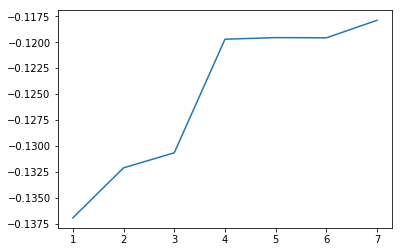

In [60]:
# 特徴数とスコアの変化をプロット
# 負のMAEが評価基準になっており，値がゼロに近いほど汎化誤差は小さい
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [61]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得できる
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True])

In [62]:
# 埋め込み法
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [63]:
# estimatorにモデルをセット
# LassoCVを使って、正則化の強さは自動決定
estimator = LassoCV(normalize=True, cv=10)

# モデルの情報を使って特徴選択を行う場合は、SelectFromModelを使う
# 今回は係数が1e-5以下である特徴を削除する
# 係数のしきい値はthresholdで指定する
sfm = SelectFromModel(estimator, threshold=1e-5)

In [64]:
# fitで特徴選択を実行
sfm.fit(X, y)

SelectFromModel(estimator=LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False),
        max_features=None, norm_order=1, prefit=False, threshold=1e-05)

In [65]:
# get_support関数で使用する特徴のインデックスを使用
# Trueになっている特徴が使用する特徴
sfm.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [66]:
# 削除すべき特徴の名前を取得 
removed_idx  = ~sfm.get_support()
pd.DataFrame(X).columns[removed_idx]

Int64Index([], dtype='int64')

In [67]:
pd.DataFrame(X).head(1)

,0,1,2,3,4,5,6
0,-1.172804,0.0,0.0,1.0,0.0,0.023667,0.271731


In [68]:
# LASSOで得た各特徴の係数の値を確認してみる
# 係数の絶対値を取得
abs_coef = np.abs(sfm.estimator_.coef_)
abs_coef

array([0.03297103, 0.03925695, 0.0994976 , 0.07124001, 0.13686747,
       0.04412193, 0.06092273])

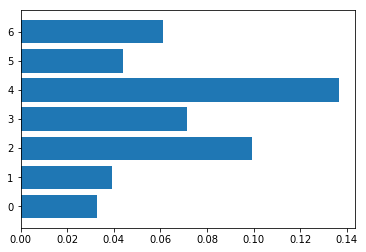

In [69]:
# 係数を棒グラフで表示
plt.barh(np.arange(0, len(abs_coef)), abs_coef, tick_label=pd.DataFrame(X).columns.values)
plt.show()
#SP98も係数がほぼゼロと判明

In [70]:
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [72]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree

#import decision_tree as dt

regr = DecisionTreeRegressor(criterion='mae', max_depth=2)
regr = regr.fit(X_train, y_train)

# テストデータに対する予測を実行
y_pred = regr.predict(X_test)

mse = mean_squared_error(np.e**y_test, np.e**y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.e**y_test, np.e**y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(np.e**y_train, np.e**y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['決定木'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)
    

,線形（全）,線形（高相）,線形（高相2）,多項式（全）,多項式（高相）,多項式（高相2）,決定木
MSE,0.635,0.630,0.640,1.367,0.521,0.603,0.334
RMSE,0.797,0.794,0.800,1.169,0.722,0.777,0.578
MAE,0.650,0.647,0.652,0.682,0.561,0.594,0.445
RMSE/MAE,1.227,1.227,1.228,1.715,1.286,1.308,1.297
決定係数,0.077,0.084,0.069,-0.988,0.243,0.214,-0.180
MSE（訓練）,0.901,0.910,0.909,0.641,0.753,0.609,0.914
RMSE（訓練）,0.949,0.954,0.953,0.801,0.868,0.780,0.956
MAE（訓練）,0.606,0.607,0.605,0.555,0.572,0.489,0.595
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443,1.518,1.594,1.608
決定係数（訓練）,0.222,0.215,0.215,0.446,0.349,0.493,0.247


In [73]:
from sklearn.ensemble import RandomForestRegressor # ランダムフォレスト回帰用
regr = RandomForestRegressor(criterion='mae', max_depth=3,n_estimators=500)
regr = regr.fit(X_train, y_train)

# テストデータに対する予測を実行
y_pred = regr.predict(X_test)
 
mse = mean_squared_error(np.e**y_test, np.e**y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.e**y_test, np.e**y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(np.e**y_train, np.e**y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['ランダム'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)    


,線形（全）,線形（高相）,線形（高相2）,多項式（全）,多項式（高相）,多項式（高相2）,決定木,ランダム
MSE,0.635,0.630,0.640,1.367,0.521,0.603,0.334,0.236
RMSE,0.797,0.794,0.800,1.169,0.722,0.777,0.578,0.486
MAE,0.650,0.647,0.652,0.682,0.561,0.594,0.445,0.408
RMSE/MAE,1.227,1.227,1.228,1.715,1.286,1.308,1.297,1.190
決定係数,0.077,0.084,0.069,-0.988,0.243,0.214,-0.180,0.115
MSE（訓練）,0.901,0.910,0.909,0.641,0.753,0.609,0.914,0.689
RMSE（訓練）,0.949,0.954,0.953,0.801,0.868,0.780,0.956,0.830
MAE（訓練）,0.606,0.607,0.605,0.555,0.572,0.489,0.595,0.541
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443,1.518,1.594,1.608,1.535
決定係数（訓練）,0.222,0.215,0.215,0.446,0.349,0.493,0.247,0.410


In [74]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3,criterion="mae"),
                                           n_estimators=10, random_state=1234)

regr = regr.fit(X_train, y_train)

# テストデータに対する予測を実行
y_pred = regr.predict(X_test)

mse = mean_squared_error(np.e**y_test, np.e**y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.e**y_test, np.e**y_pred)

y_pred2 = regr.predict(X_train)
mse2 = mean_squared_error(np.e**y_train, np.e**y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)

score1 = regr.score(X_test, y_test)
score2 = regr.score(X_train, y_train)

df_precision['アダブスト'] =  [round(mse,3),round(rmse,3),round(mae,3),round(rmse/mae,3),round(score1,3),round(mse2,3),round(rmse2,3),round(mae2,3),round(rmse2/mae2,3),round(score2,3)]
display(df_precision)    


,線形（全）,線形（高相）,線形（高相2）,多項式（全）,多項式（高相）,多項式（高相2）,決定木,ランダム,アダブスト
MSE,0.635,0.630,0.640,1.367,0.521,0.603,0.334,0.236,0.294
RMSE,0.797,0.794,0.800,1.169,0.722,0.777,0.578,0.486,0.542
MAE,0.650,0.647,0.652,0.682,0.561,0.594,0.445,0.408,0.431
RMSE/MAE,1.227,1.227,1.228,1.715,1.286,1.308,1.297,1.190,1.257
決定係数,0.077,0.084,0.069,-0.988,0.243,0.214,-0.180,0.115,0.008
MSE（訓練）,0.901,0.910,0.909,0.641,0.753,0.609,0.914,0.689,0.432
RMSE（訓練）,0.949,0.954,0.953,0.801,0.868,0.780,0.956,0.830,0.657
MAE（訓練）,0.606,0.607,0.605,0.555,0.572,0.489,0.595,0.541,0.493
RMSE/MAE（訓練）,1.566,1.571,1.576,1.443,1.518,1.594,1.608,1.535,1.332
決定係数（訓練）,0.222,0.215,0.215,0.446,0.349,0.493,0.247,0.410,0.535


In [75]:
df_x=pd.DataFrame(X)
df_x.head(1)

,0,1,2,3,4,5,6
0,-1.172804,0.0,0.0,1.0,0.0,0.023667,0.271731


In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD,RMSprop, Adagrad, Adadelta, Adam

from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes

Using TensorFlow backend.


In [77]:
#交差検証法にあたり、白色化した「sun,temp」、「distance,speed」を全て採用
y=df3['consume'].values
df30=df3.drop(["distance","speed","consume","gas_type","refill liters","refill gas","sun","temp","AC","rain","E10","SP98"],axis=1)
X=pd.concat([df20,df30,pd.DataFrame(data1_decorr)],axis=1).values

n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
cross_valid_mae2 = 0
cro_val_決定 = 0
cro_val_決定2 = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ

# 学習用データを使って回帰
    regr = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())])

    regr.fit(X_train, y_train)
    
    # テストデータに対する予測を実行
    y_pred = regr.predict(X_test)
    
    # 訓練データに対する予測を実行
    y_pred2 = regr.predict(X_train)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(np.e**y_test, np.e**y_pred)
    cro_val_決定 = regr.score(X_test, y_test)      
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    # 訓練データに対するMAEを計算
    mae2 = mean_absolute_error(np.e**y_train, np.e**y_pred2)
    cro_val_決定2 = regr.score(X_train, y_train)    
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    cross_valid_mae2 += mae2
    cro_val_決定 += cro_val_決定
    cro_val_決定2 += cro_val_決定2       
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
final_mae2 = cross_valid_mae2 / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))
print("Cross Vali 決定係数 = %s"%round(final_決定, 5))
print()
print("（訓練データ）Cross Validation MAE = %s"%round(final_mae2, 3))
print("（訓練）Cross Validation 決定 = %s"%round(final_決定2, 5))

Fold 1
MAE = 0.732

Fold 2
MAE = 0.696

Fold 3
MAE = 0.681

Fold 4
MAE = 0.521

Fold 5
MAE = 0.593

Cross Validation MAE = 0.645
Cross Vali 決定係数 = -0.36537

（訓練データ）Cross Validation MAE = 0.534
（訓練）Cross Validation 決定 = 0.13299


Cross Validation Try 1 / 5
MAE : 0.760320366345919
Cross Validation Try 2 / 5
MAE : 0.6529617126171404
Cross Validation Try 3 / 5
MAE : 0.6245283554761839
Cross Validation Try 4 / 5
MAE : 0.5445814621912968
Cross Validation Try 5 / 5
MAE : 0.6459575033807137

Cross Validation MAE = 0.646


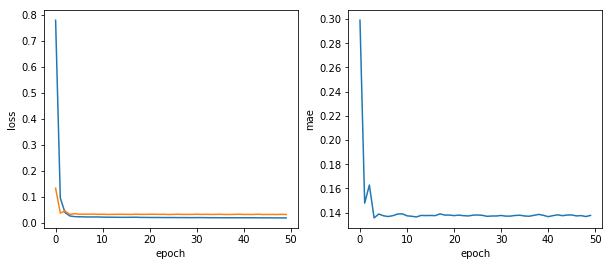

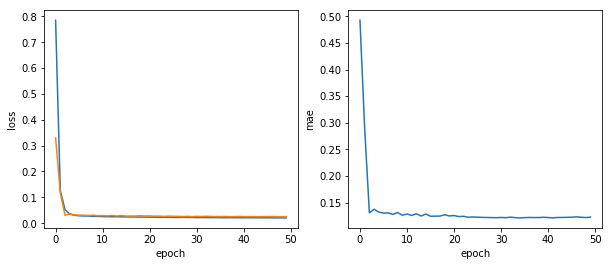

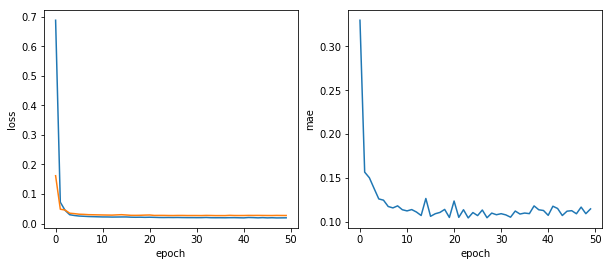

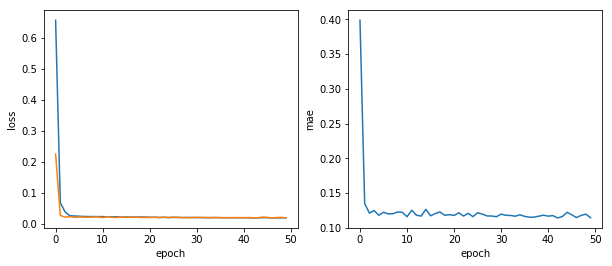

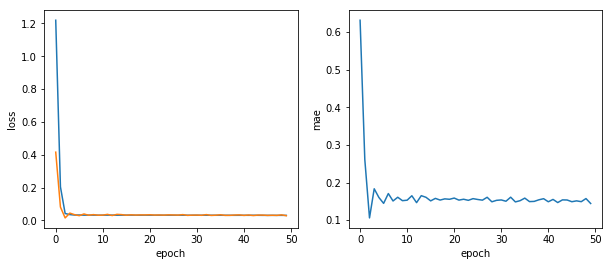

In [78]:
def run(X, y):    

    # ------ 最適化手法 ------
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
    # rms = RMSprop(lr=0.01)
    # adag = Adagrad(lr=0.01)
    # adad = Adadelta(lr=0.01)
    # adam = Adam(lr=0.01)
    # -----------------------------

    n_split = 5
    cross_valid_mae = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
        model = Sequential()
        model.add(Dense(7, activation='relu', input_dim=7))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1)) #, activation='softmax')
        
        # 回帰にはcategorical_crossentropyではなくmae。
        model.compile(loss='mean_squared_error',
                  optimizer=sgd,
                  metrics=['mae'])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        fit = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=20,
                        validation_data=(X_test, y_test),
                       verbose=0)

        
        print(f"Cross Validation Try {split_num} / {n_split}")
        # テストデータに対するMAEを計算
        y_pred_test = model.predict(X_test)
        mae = mean_absolute_error(np.e**y_test, np.e**y_pred_test)
        # cro_val_決定 = model.best_score_

        print(f"MAE : {mae}")
        # print(f"決定係数 : {cro_val_決定}")
        
        
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        # グラフ化
        df = pd.DataFrame(fit.history)
        axL.plot(df[["loss", "val_loss"]])
        axL.set_ylabel("loss")
        axL.set_xlabel("epoch")

        axR.plot(df[["val_mean_absolute_error"]])
        axR.set_ylabel("mae")
        axR.set_xlabel("epoch")
        fig.show()

        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        # cro_val_決定 += cro_val_決定
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    
    print()
    print("Cross Validation MAE = %s"% (round(final_mae, 3)))

run(X, y)

# show the model summary（defで作成した関数について）
#run().summary()

Cross Validation Try 1 / 5
MAE : 1.0294532054509868
Cross Validation Try 2 / 5
MAE : 0.68262690947606
Cross Validation Try 3 / 5
MAE : 0.5839710565713735
Cross Validation Try 4 / 5
MAE : 0.5514625982804733
Cross Validation Try 5 / 5
MAE : 0.4729127982994179

Cross Validation MAE = 0.664


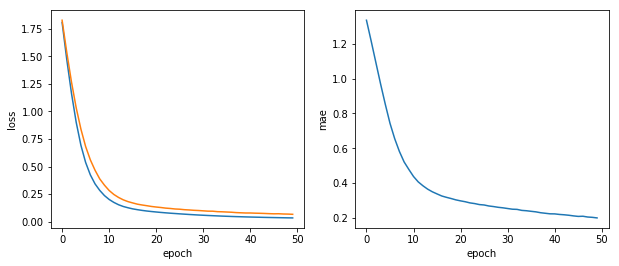

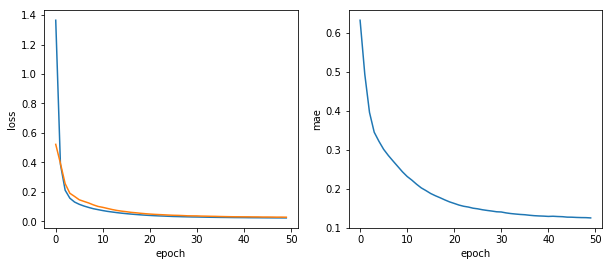

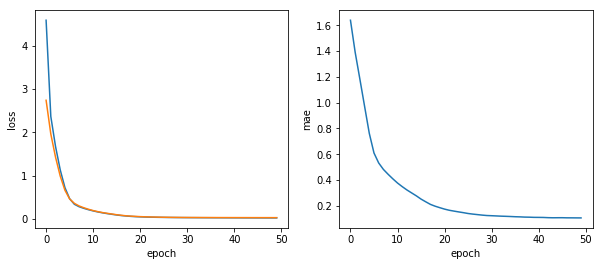

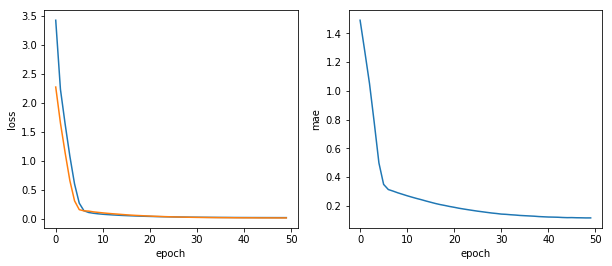

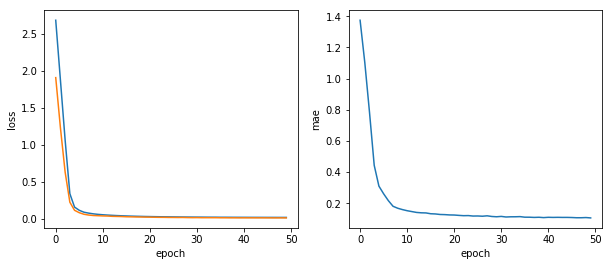

In [79]:
def run(X, y):    

    # ------ 最適化手法 ------
    #sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
    # rms = RMSprop(lr=0.01)
    # adag = Adagrad(lr=0.01)
    # adad = Adadelta(lr=0.01)
    # adam = Adam(lr=0.01)
    adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

    n_split = 5
    cross_valid_mae = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
        model = Sequential()
        model.add(Dense(7, activation='relu', input_dim=7))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1)) #, activation='softmax')
        
        # 回帰にはcategorical_crossentropyではなくmae。
        model.compile(loss='mean_squared_error',
                  optimizer=adam,
                  metrics=['mae'])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        fit = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=20,
                        validation_data=(X_test, y_test),
                       verbose=0)

        
        print(f"Cross Validation Try {split_num} / {n_split}")
        # テストデータに対するMAEを計算
        y_pred_test = model.predict(X_test)
        mae = mean_absolute_error(np.e**y_test, np.e**y_pred_test)
        print(f"MAE : {mae}")

        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        # グラフ化
        df = pd.DataFrame(fit.history)
        axL.plot(df[["loss", "val_loss"]])
        axL.set_ylabel("loss")
        axL.set_xlabel("epoch")

        axR.plot(df[["val_mean_absolute_error"]])
        axR.set_ylabel("mae")
        axR.set_xlabel("epoch")
        fig.show()

        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print()
    print("Cross Validation MAE = %s"% (round(final_mae, 3)))

run(X, y)

Cross Validation Try 1 / 5
MAE : 0.7224203659937932
Cross Validation Try 2 / 5
MAE : 0.7856342340127017
Cross Validation Try 3 / 5
MAE : 0.5896851747463911
Cross Validation Try 4 / 5
MAE : 0.504877282427503
Cross Validation Try 5 / 5
MAE : 0.5334052197344893

Cross Validation MAE = 0.627


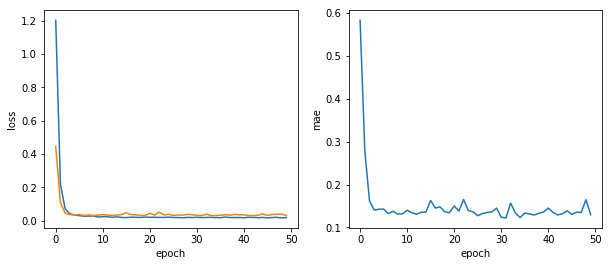

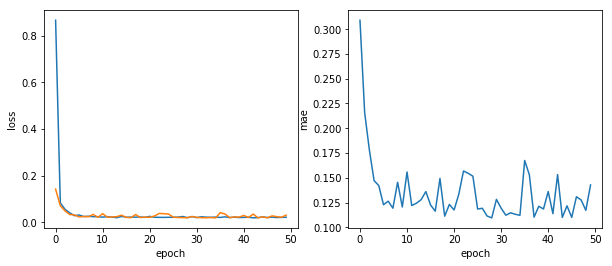

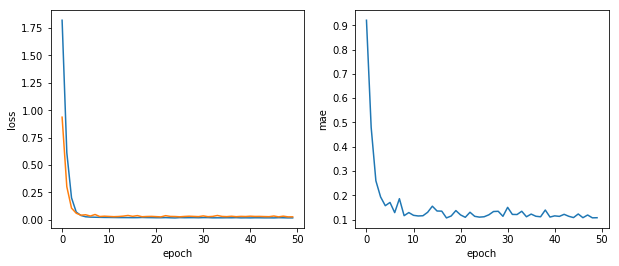

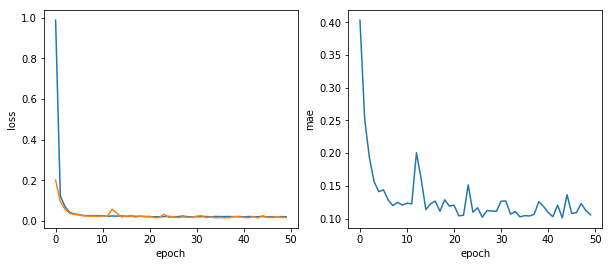

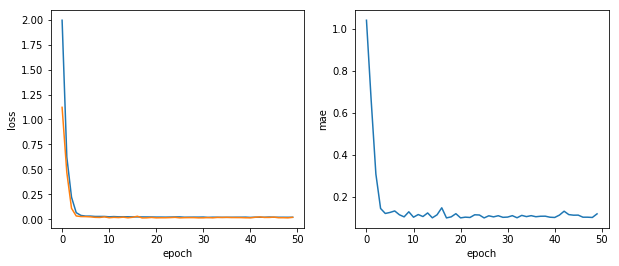

In [80]:
def run(X, y):    

    # ------ 最適化手法 ------
    #sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
    rms = RMSprop(lr=0.01)
    # adag = Adagrad(lr=0.01)
    # adad = Adadelta(lr=0.01)
    # adam = Adam(lr=0.01)
    # -----------------------------

    n_split = 5
    cross_valid_mae = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
        model = Sequential()
        model.add(Dense(7, activation='relu', input_dim=7))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1)) #, activation='softmax')
        
        # 回帰にはcategorical_crossentropyではなくmae。
        model.compile(loss='mean_squared_error',
                  optimizer=rms,
                  metrics=['mae'])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        fit = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=20,
                        validation_data=(X_test, y_test),
                       verbose=0)

        
        print(f"Cross Validation Try {split_num} / {n_split}")
        # テストデータに対するMAEを計算
        y_pred_test = model.predict(X_test)
        mae = mean_absolute_error(np.e**y_test, np.e**y_pred_test)
        print(f"MAE : {mae}")
        
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        # グラフ化
        df = pd.DataFrame(fit.history)
        axL.plot(df[["loss", "val_loss"]])
        axL.set_ylabel("loss")
        axL.set_xlabel("epoch")

        axR.plot(df[["val_mean_absolute_error"]])
        axR.set_ylabel("mae")
        axR.set_xlabel("epoch")
        fig.show()

        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print()
    print("Cross Validation MAE = %s"% (round(final_mae, 3)))

run(X, y)

Cross Validation Try 1 / 5
MAE : 0.9874201261080228
Cross Validation Try 2 / 5
MAE : 0.9581116138360437
Cross Validation Try 3 / 5
MAE : 1.0003821947635747
Cross Validation Try 4 / 5
MAE : 0.805943695910565
Cross Validation Try 5 / 5
MAE : 0.933098737295572

Cross Validation MAE = 0.937


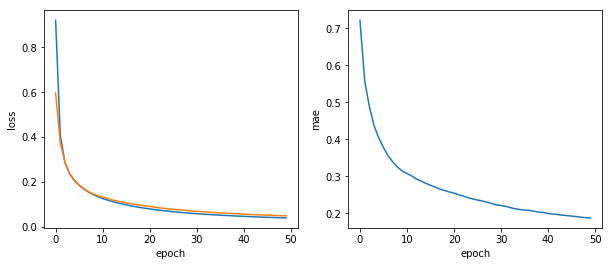

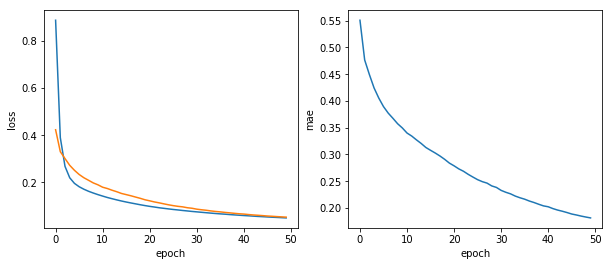

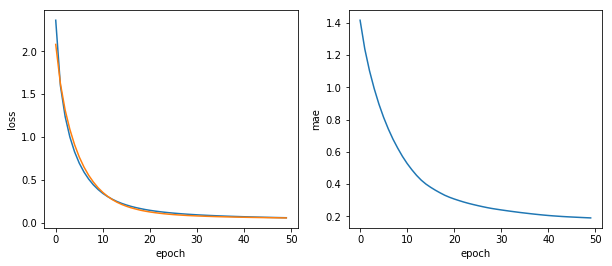

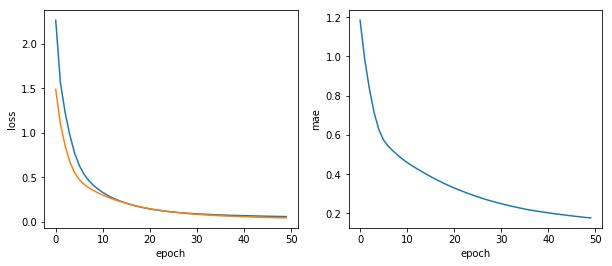

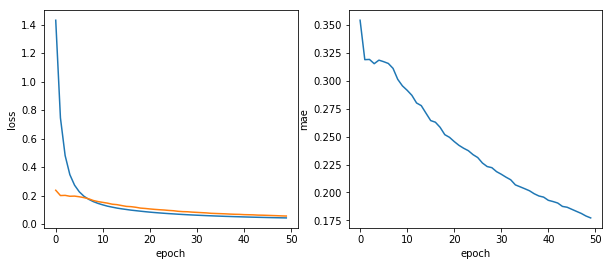

In [81]:
def run(X, y):    

    # ------ 最適化手法 ------
    #sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
    #rms = RMSprop(lr=0.01)
    adag = Adagrad(lr=0.01)
    # adad = Adadelta(lr=0.01)
    # adam = Adam(lr=0.01)
    # -----------------------------

    n_split = 5
    cross_valid_mae = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
        model = Sequential()
        model.add(Dense(7, activation='relu', input_dim=7))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1)) #, activation='softmax')
        
        # 回帰にはcategorical_crossentropyではなくmae。
        model.compile(loss='mean_squared_error',
                  optimizer=adag,
                  metrics=['mae'])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        fit = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=20,
                        validation_data=(X_test, y_test),
                       verbose=0)

        
        print(f"Cross Validation Try {split_num} / {n_split}")
        # テストデータに対するMAEを計算
        y_pred_test = model.predict(X_test)
        mae = mean_absolute_error(np.e**y_test, np.e**y_pred_test)
        print(f"MAE : {mae}")
        
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        # グラフ化
        df = pd.DataFrame(fit.history)
        axL.plot(df[["loss", "val_loss"]])
        axL.set_ylabel("loss")
        axL.set_xlabel("epoch")

        axR.plot(df[["val_mean_absolute_error"]])
        axR.set_ylabel("mae")
        axR.set_xlabel("epoch")
        fig.show()

        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print()
    print("Cross Validation MAE = %s"% (round(final_mae, 3)))

run(X, y)

Cross Validation Try 1 / 5
MAE : 3.9838089093183853
Cross Validation Try 2 / 5
MAE : 4.097639962343068
Cross Validation Try 3 / 5
MAE : 3.634573305570162
Cross Validation Try 4 / 5
MAE : 3.1160479474377323
Cross Validation Try 5 / 5
MAE : 3.32033189024244

Cross Validation MAE = 3.63


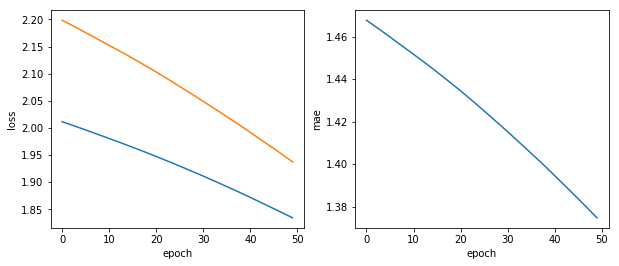

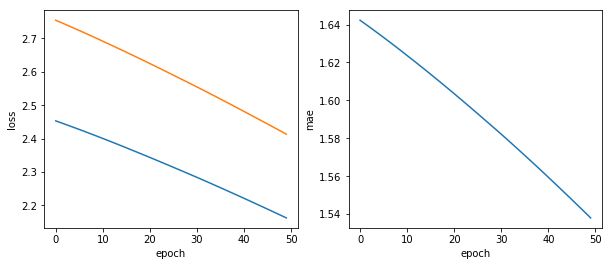

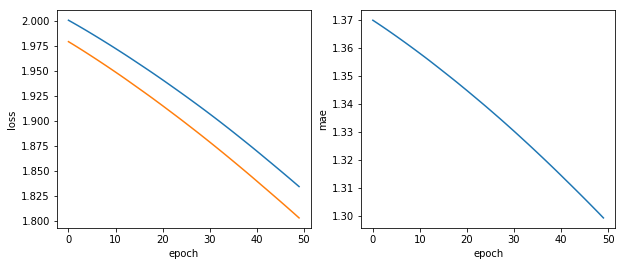

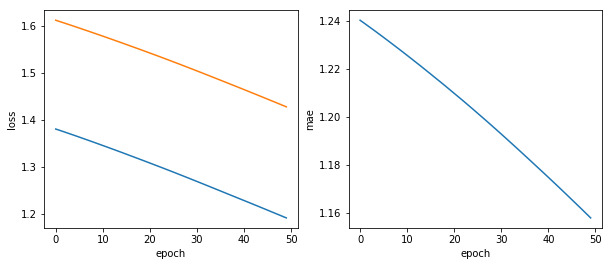

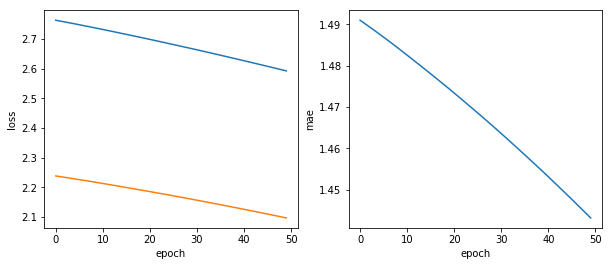

In [82]:
def run(X, y):    

    # ------ 最適化手法 ------
    #sgd = SGD(lr=0.01, momentum=0.9, nesterov=False)
    #rms = RMSprop(lr=0.01)
    # adag = Adagrad(lr=0.01)
    adad = Adadelta(lr=0.01)
    # adam = Adam(lr=0.01)
    # -----------------------------

    n_split = 5
    cross_valid_mae = 0
    split_num = 1

    for train_idx, test_idx in KFold(n_splits=n_split, random_state=1234).split(X, y):
        model = Sequential()
        model.add(Dense(7, activation='relu', input_dim=7))
        model.add(Dense(5, activation='relu'))
        model.add(Dense(1)) #, activation='softmax')
        
        # 回帰にはcategorical_crossentropyではなくmae。
        model.compile(loss='mean_squared_error',
                  optimizer=adad,
                  metrics=['mae'])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        fit = model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=20,
                        validation_data=(X_test, y_test),
                       verbose=0)

        
        print(f"Cross Validation Try {split_num} / {n_split}")
        # テストデータに対するMAEを計算
        y_pred_test = model.predict(X_test)
        mae = mean_absolute_error(np.e**y_test, np.e**y_pred_test)
        print(f"MAE : {mae}")
        
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        # グラフ化
        df = pd.DataFrame(fit.history)
        axL.plot(df[["loss", "val_loss"]])
        axL.set_ylabel("loss")
        axL.set_xlabel("epoch")

        axR.plot(df[["val_mean_absolute_error"]])
        axR.set_ylabel("mae")
        axR.set_xlabel("epoch")
        fig.show()

        cross_valid_mae += mae #後で平均を取るためにMAEを加算
        split_num += 1

    # MAEの平均値を最終的な汎化誤差値とする
    final_mae = cross_valid_mae / n_split
    print()
    print("Cross Validation MAE = %s"% (round(final_mae, 3)))

run(X, y)

In [83]:
from keras.layers import LSTM
import math

In [84]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6
0,-1.172804,0.0,0.0,1.0,0.0,0.023667,0.271731
1,-0.878274,0.0,0.0,0.0,0.0,0.038732,0.444712
2,-0.289216,0.0,0.0,0.0,0.0,0.068864,0.790673
3,-0.436480,0.0,0.0,0.0,0.0,0.053798,0.617692
4,0.299843,0.0,0.0,0.0,0.0,0.068864,0.790673


In [85]:
y=df3['consume'].values
df30=df3.drop(["distance","speed","consume","gas_type","refill liters","refill gas","sun","temp","AC","rain","E10","SP98"],axis=1)
X=pd.concat([df20,df30,pd.DataFrame(data1_decorr)],axis=1).values

# 利用できるデータのうち、学習用を8割、テスト用を2割にする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(5, input_shape=(1, 7)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
 - 2s - loss: 1.7195
Epoch 2/10
 - 1s - loss: 0.5057
Epoch 3/10
 - 1s - loss: 0.0843
Epoch 4/10
 - 1s - loss: 0.0373
Epoch 5/10
 - 1s - loss: 0.0287
Epoch 6/10
 - 1s - loss: 0.0254
Epoch 7/10
 - 1s - loss: 0.0236
Epoch 8/10
 - 1s - loss: 0.0231
Epoch 9/10
 - 1s - loss: 0.0228
Epoch 10/10
 - 1s - loss: 0.0225


In [86]:
# make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.3f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.3f RMSE' % (testScore))

Train Score: 0.147 RMSE
Test Score: 0.145 RMSE
